In [2]:
# -*- coding: utf-8 -*-
"""
项目名称： word2vec模型训练
"""
import pandas as pd
import numpy as np
import jieba
import re
import codecs
import os
import time
from gensim.models import word2vec
#首先将所有文件放在桌面的文件夹0000下
#==========注意以下两行需要改成你所要的文件路径和名称=============
Dir=os.path.abspath('')#获取绝对路径
news=pd.read_csv("实验4_新闻.csv",encoding='gbk')
#============================================================

class ClearData:
  def __init__(self, content):
    self.content = content
    pass
  #========提取中文字符=============
  def Extract(self,line):
      dr=re.compile(u'[\u4e00-\u9fa5]')
      return ''.join(dr.findall(line))
  def ExtractHanWen(self):
      ExtractData=[]
      for line in self.content:
          ExtractData.append(self.Extract(line))
      return ExtractData
  def __str__(self):
      print ('%s'%self.ExtractHanWen())

#===============分词=========================
class CutData(object):
    def __init__(self,text):
        self.cuttext=text
    pass
    def cutText(self):
        Text=[]
        for singleline in self.cuttext:
            wordSeg = jieba.cut(singleline, cut_all=False)
            Text.append(" ".join(wordSeg))
        return Text
    def __str__(self):
        print("%s"%self.cutText())

#==========去停用词===================
class DelStopWords(object):
    def __init__(self,data,stopwords):
        self.data=data
        self.stopwords=stopwords
        self.all_text=[]
        self.join_text=[]
    pass
    def Del(self):
        for line in self.data:
            single_text = []
            for word in line.split(' '):
                if '"' + word + '"' not in stopwords:
                    if len(word) >= 2:
                        single_text.append(word)
                    pass
                self.join_text = " ".join(single_text)
            self.all_text.append(self.join_text)
        return self.all_text
    def __str__(self):
        print("%s"%self.all_text)

def LoadStopWords():
    stopwords=[]
    filename='stopwords.txt'
    if os.path.exists(filename):
        st = codecs.open("stopwords.txt", "rb", encoding="gbk")
        for line in st:
            line = line.strip()
            stopwords.append(line)
    else:
        print("error:停词表不存在，请添加...")
    pass
    return stopwords

class TrainWord2Vec():
    def train():  
        print("开始清洗数据:")
        Data=ClearData(news['ART_CONTENT'])
        Cleared=Data.ExtractHanWen()
        cutData=CutData(Cleared).cutText()
        #print ('分词结果：',cutData[0])
        print("...加载停用词表...")
        stopwords=LoadStopWords()
        print("...去停用词...")
        CorpusData=DelStopWords(cutData,stopwords).Del()
        sens_list=[]
        for data in CorpusData:
            #print('data:',data)
            sen=data.split(' ')  
            sens_list.append(sen)
        print("...训练模型...")
        model=word2vec.Word2Vec(sens_list,iter=20,size=100)
        print('...存放模型...')
        model.save('./word2vec.model')

if __name__=='__main__':
    #print（'训练模型'）
    #TrainWord2Vec.train()
    print('下载模型')
    model=word2vec.Word2Vec.load('word2vec.model')
    word_vectors={}
    for word in (model.wv.vocab):
        word_vectors[word]=model[word]
    print("美国和特朗普相似度",model.similarity("美国","特朗普"))
    print("中国和特朗普相似度",model.similarity("中国","特朗普"))
    print("基金和股票普相似度",model.similarity("基金","股票"))
    print("特朗普和股票普相似度",model.similarity("特朗普","股票"))

下载模型
美国和特朗普相似度 0.4763544
中国和特朗普相似度 0.17196551
基金和股票普相似度 0.2557576
特朗普和股票普相似度 0.039486375


<ipython-input-2-d81f2ce10138>:112: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vectors[word]=model[word]
<ipython-input-2-d81f2ce10138>:113: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  print("美国和特朗普相似度",model.similarity("美国","特朗普"))
<ipython-input-2-d81f2ce10138>:114: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  print("中国和特朗普相似度",model.similarity("中国","特朗普"))
<ipython-input-2-d81f2ce10138>:115: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  print("基金和股票普相似度",model.similarity("基金","股票"))
<ipython-input-2-d81f2ce10138>:116: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  print("特朗普和股票普相似度",model.simi

删除停用词,并分词成功！
----Topic 0-----:
(0, '0.017*"Swisse" + 0.015*"维生素D" + 0.013*"30ml" + 0.012*"配方" + 0.012*"胶囊" + 0.011*"滴剂" + 0.011*"月见草" + 0.010*"奶粉" + 0.010*"婴幼儿" + 0.010*"婴儿" + 0.010*"BABYNES" + 0.009*"2段" + 0.009*"500ml" + 0.009*"心美力" + 0.009*"超级" + 0.009*"白金版" + 0.009*"瑞士" + 0.008*"爱智宝" + 0.008*"胶原蛋白液" + 0.008*"港版" + 0.008*"钙" + 0.007*"雀巢" + 0.007*"蜂胶" + 0.007*"惠氏" + 0.007*"乳蛋白" + 0.007*"3段" + 0.007*"雅培" + 0.007*"葡萄糖" + 0.007*"胺片" + 0.007*"部分水解" + 0.007*"德国" + 0.007*"油" + 0.007*"片新" + 0.006*"兰芝" + 0.006*"梅子味" + 0.006*"叶绿素液" + 0.006*"高强度" + 0.006*"儿童" + 0.006*"Salus" + 0.006*"莎露斯" + 0.006*"调色" + 0.006*"隔离霜" + 0.006*"800g" + 0.006*"核苷酸" + 0.006*"Purtier" + 0.006*"1段" + 0.006*"精华" + 0.006*"250mL" + 0.006*"SPF25" + 0.006*"护肤霜" + 0.006*"乌龟" + 0.006*"幼儿" + 0.006*"维C" + 0.006*"灰色" + 0.006*"晚霜" + 0.006*"玻尿酸" + 0.006*"芭乐雅" + 0.006*"零度" + 0.005*"粉色" + 0.005*"泡腾片" + 0.005*"较大" + 0.005*"铁元" + 0.005*"100ml" + 0.005*"820g" + 0.005*"水润" + 0.005*"多维" + 0.005*"玉米" + 0.005*"黄素" + 0.005*"叶黄素" + 0.005*"蒂

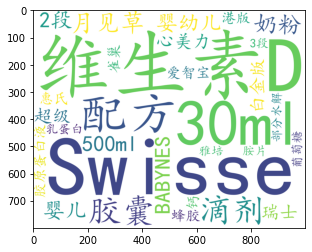

----Topic 1-----:
(1, '0.013*"炒锅" + 0.012*"系列" + 0.011*"Swisse" + 0.011*"配方" + 0.011*"1段" + 0.010*"蛋白" + 0.010*"乳清" + 0.010*"喜力特" + 0.010*"800g" + 0.009*"2段" + 0.009*"雅培" + 0.009*"成长" + 0.009*"奶粉" + 0.009*"喜宝" + 0.009*"雀巢" + 0.008*"口味" + 0.008*"有机" + 0.008*"BIO" + 0.008*"苹果" + 0.008*"婴儿" + 0.008*"胶囊" + 0.007*"改善" + 0.007*"睡眠" + 0.007*"补铁片" + 0.007*"Ultiboost" + 0.007*"运动" + 0.007*"--" + 0.007*"超品" + 0.007*"能量" + 0.007*"饮料" + 0.007*"儿童" + 0.007*"部分水解" + 0.007*"卵磷脂" + 0.007*"1200mg" + 0.007*"骨骼" + 0.007*"Combiotic" + 0.007*"SELARASTONE" + 0.007*"PROFI" + 0.006*"EVOLIAHA" + 0.006*"咀嚼" + 0.006*"香橙味" + 0.006*"营养" + 0.006*"维生素" + 0.006*"HiPP" + 0.006*"莓果" + 0.006*"Doppelherz" + 0.006*"益智" + 0.006*"福腾宝" + 0.006*"中华" + 0.006*"菲仕乐味" + 0.006*"CERADURPLUS" + 0.006*"喷雾" + 0.006*"雅漾" + 0.006*"活泉" + 0.006*"冲剂" + 0.006*"专业" + 0.006*"舒" + 0.006*"压力锅" + 0.006*"达维" + 0.006*"咀嚼片" + 0.005*"桃子" + 0.005*"婴幼儿" + 0.005*"奇异果" + 0.005*"柠檬" + 0.005*"补铁" + 0.005*"超级" + 0.005*"白金版" + 0.005*"瑞士" + 0.005*"15ml" + 0.

----Topic 2-----:
(2, '0.018*"HiPP" + 0.017*"喜宝" + 0.017*"奶粉" + 0.016*"配方" + 0.014*"有机" + 0.014*"惠氏" + 0.014*"3段" + 0.013*"婴幼儿" + 0.013*"港版" + 0.013*"婴儿" + 0.011*"德国" + 0.010*"孕产妇" + 0.010*"Combiotic" + 0.010*"泡腾片" + 0.010*"部分水解" + 0.009*"益生元" + 0.009*"野生" + 0.009*"较大" + 0.008*"1500mg" + 0.008*"腥味" + 0.008*"胶囊" + 0.008*"鱼油" + 0.008*"乳蛋白" + 0.007*"高强度" + 0.007*"2段" + 0.007*"Swisse" + 0.007*"维C" + 0.007*"ab12" + 0.007*"PRE" + 0.007*"哺乳期" + 0.007*"孕期" + 0.006*"身体" + 0.006*"75ml" + 0.006*"英格拉姆" + 0.006*"雅培" + 0.006*"叶酸" + 0.006*"奶蓟草" + 0.006*"肝脏" + 0.006*"排毒" + 0.006*"维生素C" + 0.006*"加锌" + 0.006*"精选" + 0.006*"350g" + 0.006*"谷物" + 0.006*"粉" + 0.006*"施巴" + 0.006*"乳" + 0.006*"乳清" + 0.006*"蛋白" + 0.005*"护手霜" + 0.005*"水解" + 0.005*"深度" + 0.005*"Alimentum" + 0.005*"紫色" + 0.005*"补铁" + 0.005*"凯蒂" + 0.005*"猫" + 0.005*"餐具" + 0.005*"桃子" + 0.005*"芒果" + 0.005*"幼儿" + 0.005*"米粉" + 0.005*"儿童" + 0.005*"饲" + 0.005*"满趣" + 0.005*"730g" + 0.005*"健草" + 0.005*"BABYNES" + 0.005*"200g" + 0.005*"铂臻" + 0.005*"900g" + 0

----Topic 3-----:
(3, '0.018*"维生素" + 0.015*"复合" + 0.014*"Swisse" + 0.014*"德国世家" + 0.011*"律动" + 0.011*"进口" + 0.011*"Huggies" + 0.011*"好奇" + 0.011*"韩国" + 0.011*"咀嚼片" + 0.011*"纸尿裤" + 0.011*"铂金" + 0.010*"口味" + 0.010*"儿童" + 0.010*"能量" + 0.010*"饮料" + 0.010*"超品" + 0.010*"--" + 0.010*"运动" + 0.009*"清肺" + 0.008*"佳儿" + 0.008*"美素" + 0.008*"安瓶" + 0.008*"甘露" + 0.008*"软胶囊" + 0.008*"香港" + 0.008*"皇家" + 0.008*"婴儿" + 0.007*"男性" + 0.007*"调理液" + 0.007*"香蜂草" + 0.007*"25000mg" + 0.006*"日霜" + 0.006*"柠檬酸" + 0.006*"钙D" + 0.006*"300ml" + 0.006*"黄瓜" + 0.006*"卸妆液" + 0.006*"锁水" + 0.006*"800g" + 0.006*"蔓越莓" + 0.006*"阶" + 0.006*"Pre" + 0.006*"600g" + 0.006*"面霜" + 0.006*"柔润" + 0.006*"猕猴桃" + 0.006*"西瓜" + 0.006*"经典" + 0.006*"可乐" + 0.006*"S76" + 0.006*"M72" + 0.006*"XL44" + 0.006*"酸片" + 0.006*"透明质" + 0.006*"加" + 0.005*"胶原蛋白" + 0.005*"N" + 0.005*"S" + 0.005*"抗敏" + 0.005*"施巴" + 0.005*"保湿" + 0.005*"梨" + 0.005*"药丸" + 0.005*"蒂佳婷" + 0.005*"kids" + 0.005*"脑部" + 0.005*"高强度" + 0.005*"发育" + 0.005*"夜间" + 0.005*"成长" + 0.005*"香蕉" + 0

----Topic 4-----:
(4, '0.021*"乳蛋白" + 0.020*"配方" + 0.019*"奶粉" + 0.019*"部分水解" + 0.016*"惠氏" + 0.016*"800g" + 0.016*"1段" + 0.016*"2段" + 0.016*"港版" + 0.014*"心美力" + 0.014*"婴儿" + 0.013*"雅培" + 0.013*"有机" + 0.012*"幼儿" + 0.012*"3段" + 0.010*"EVOLIAHA" + 0.009*"HMO" + 0.009*"婴幼儿" + 0.009*"喜宝" + 0.009*"德国" + 0.008*"雀巢" + 0.008*"BABYNES" + 0.008*"820g" + 0.007*"较大" + 0.007*"羊奶粉" + 0.007*"400g" + 0.007*"星球" + 0.007*"Bambinchen" + 0.006*"蓝色" + 0.006*"女性" + 0.006*"面膜" + 0.006*"HiPP" + 0.006*"德国世家" + 0.006*"Ultiboost" + 0.006*"补铁片" + 0.006*"Swisse" + 0.006*"美素力" + 0.005*"米粉" + 0.005*"200g" + 0.005*"计时器" + 0.005*"菲仕乐" + 0.005*"烹饪" + 0.005*"精华液" + 0.005*"修护" + 0.005*"复合" + 0.005*"清爽型" + 0.005*"玫瑰" + 0.005*"甘菊" + 0.005*"清小" + 0.005*"贺本" + 0.005*"混合" + 0.005*"水果味" + 0.005*"粉末" + 0.005*"红" + 0.005*"铁片" + 0.005*"不锈钢" + 0.005*"皂" + 0.005*"MT" + 0.005*"百香果" + 0.005*"夜间" + 0.005*"水润" + 0.005*"绿色" + 0.005*"修复" + 0.005*"毛孔" + 0.005*"70g" + 0.005*"铁源素" + 0.005*"ab1" + 0.005*"900g" + 0.005*"铂臻" + 0.005*"Wyeth" + 0.0

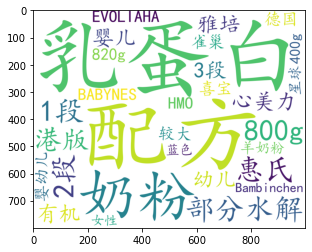

----Topic 5-----:
(5, '0.021*"益生元" + 0.020*"婴幼儿" + 0.018*"德国" + 0.017*"喜宝" + 0.017*"HiPP" + 0.014*"奶粉" + 0.011*"AbbottPureBliss" + 0.011*"700g" + 0.011*"美国" + 0.009*"香蕉" + 0.009*"Swisse" + 0.009*"新版" + 0.008*"100g" + 0.008*"吸吸乐" + 0.008*"软胶囊" + 0.008*"1段" + 0.008*"口服液" + 0.007*"惠氏" + 0.007*"乳" + 0.007*"钙D" + 0.007*"柠檬酸" + 0.007*"婴儿" + 0.007*"葡萄籽" + 0.007*"14250mg" + 0.007*"雅培" + 0.007*"苹果梨" + 0.007*"口味" + 0.007*"皇金肝" + 0.006*"草莓" + 0.006*"500ml" + 0.006*"BABYNES" + 0.006*"NB76" + 0.006*"EPA" + 0.006*"莎露斯" + 0.006*"Salus" + 0.006*"较大" + 0.006*"森力亚" + 0.006*"SoriaNatural" + 0.006*"胶囊" + 0.006*"深海鱼" + 0.006*"精华" + 0.006*"Wyeth" + 0.006*"900g" + 0.006*"铂臻" + 0.005*"DHA" + 0.005*"3段" + 0.005*"净化" + 0.005*"50ml" + 0.005*"麦" + 0.005*"蜂蜜" + 0.005*"卢卡" + 0.005*"港版" + 0.005*"润肤乳" + 0.005*"油" + 0.005*"鸭" + 0.005*"填充" + 0.005*"草本" + 0.005*"滋补" + 0.005*"液红元" + 0.005*"配方" + 0.005*"HMO" + 0.005*"氨糖" + 0.005*"野玫瑰" + 0.005*"果" + 0.005*"软骨素" + 0.005*"纸尿裤" + 0.005*"铂金" + 0.005*"腥味" + 0.005*"1500mg" + 0.0

In [17]:
import numpy as np
import pandas as pd
import re, os, jieba
import csv
import gensim
import codecs
import wordcloud
from gensim import models
from gensim.models import word2vec
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import collections
from collections import Counter
import matplotlib.pyplot as plt
import cv2
"""第一步：用正则表达式清洗数据，并去除停用词"""
df = pd.read_csv("实验4_跨境电商.csv",encoding='gbk')
df = df[['ID', '商品']].dropna()  # 删除缺失数据
ItemIDlist=df['ID'].tolist()#ItemID组成的List
#print('ItemIDlist',len(ItemIDlist),ItemIDlist)
def stopwordslist():
    stopwords = [line.strip() for line in open('./cn_stopwords.txt', encoding='UTF-8').readlines()]
    return stopwords
def seg_depart(sentence):
    jieba.add_word("益生元")
    jieba.add_word("乳蛋白")
    jieba.add_word("维C")
    jieba.add_word("英格拉姆")
    jieba.add_word("喜力特")
    jieba.add_word("心美力")
    jieba.add_word("雅漾")
    jieba.add_word("锁水")
    jieba.add_word("德国世家")
    jieba.add_word("芭乐雅")
    jieba.add_word("玻尿酸")
    jieba.add_word("铂臻")
    jieba.add_word("补铁")
    jieba.add_word("吸吸乐")
    jieba.add_word("部分水解")
    jieba.add_word("1段")
    jieba.add_word("2段")
    jieba.add_word("3段")
    jieba.add_word("补铁片")
    jieba.add_word("维生素D")
    jieba.add_word("维生素C")
    jieba.add_word("钙D")
    jieba.add_word("成长裤")
    jieba.add_word("大号")
    jieba.add_word("梅子味")
    jieba.add_word("水果味")
    jieba.add_word("香橙味")
    jieba.add_word("洗脸液")
    jieba.add_word("洗脸液")
    jieba.add_word("胶原蛋白液")
    jieba.add_word("叶绿素液")
    sentence_depart = jieba.cut(sentence.strip())

    stopwords = stopwordslist()
    outstr = ''
    for word in sentence_depart:
        #print('word:',word)
        if 'mg' in word:
            word=word.split('mg')
            word=str(word[0])+'mg'
        if word not in stopwords and word!=' ':
            if not word.isdigit():#过滤掉单独数字
                outstr += word
                outstr += "|"
    return outstr.strip('|')
def fenciresults():
    outfilename = "fenci results.csv"
    f = open(outfilename, 'w', newline='', encoding='utf-8-sig')
    csv_writer = csv.writer(f)
    csv_writer.writerow(['ID', 'Item', 'Item_fenci'])
    for IDX, Values in df.iterrows():
        ID = Values['ID']
        #print('ID:', ID)
        Item = Values['商品']
        #print('Item:', Item)
        Item=Item.replace('克','g')
        Item = Item.replace('G', 'g')
        Item = Item.replace('S-26', '')
        #fenci = re.sub('片片', '片', str(Item))
        #fenci = re.sub(r'[^\u4e00-\u9fa5]+', '', fenci)
        fenci_seg = seg_depart(Item.strip()) #开始分词
        #print('分词后结果:', fenci_seg)
        csv_writer.writerow([str(ID), str(Item), str(fenci_seg)])#保存分词结果
    f.close()
    print("删除停用词,并分词成功！")

def LDA(K):
    allwords = []  # 所有的词汇
    train = []  # 所有样本
    f = open("./fenci results.csv", 'r', encoding='utf-8-sig')
    reader = csv.reader(f)
    i=1
    for row in reader:
        if i>1:
            fenci=row[2]
            wordslist=fenci.split('|')
            train.append(wordslist)
            for word in wordslist:
                allwords.append(word)
        i=i+1
    dictionary = corpora.Dictionary(train)#"""构建词频矩阵，训练LDA模型"""
    corpus = [dictionary.doc2bow(text) for text in train]
    tfidf = models.TfidfModel(corpus)  # 统计tfidf
    corpustfidf = tfidf[corpus]  # 得到每个文本的tfidf向量，稀疏矩阵
    
    lda = LdaModel(corpus=corpustfidf, id2word=dictionary,minimum_probability=pow(0.01,1000),
                num_topics=K,alpha='auto',eta='auto',iterations=10000, gamma_threshold=0.001, random_state=1)
    #取主题下的关键词#
    keyword = codecs.open('TopicKeyword' + str(K) + '.txt', 'w', encoding='utf8')
    i = 0#第i个主题
    for topic in lda.print_topics(num_topics=K, num_words=100):
        print('----Topic ' + str(i) + '-----:')
        keyword.write('----Topic ' + str(i) + '-----:' + '\n')
        print (topic)
        topic = str(topic).split(',')[1]
        topic = topic.strip('\')')
        topiclist = str(topic).split('+')
        word_list=[]
        for topic in topiclist:
            topic = topic.replace('\'', '').strip('\r\n')
            topic = topic.replace('*', ' ').strip('\r\n')
            topic = topic.replace('"', '').strip('\r\n')
            topic=topic.strip(' ')
            topic=topic.split(' ')
            weight=topic[0]
            word=topic[1]
            word_list.append(word)
            print('word and weight:',word,weight)
            keyword.write(word + ' '+str(float(weight))+'\n')
        i = i + 1
        text=" ".join(word_list)
        w=wordcloud.WordCloud(width=1000,height=800,background_color="white",max_words=30,font_path=r"C:\Windows\Fonts\simkai.ttf")
        w.generate(text)  #生成每个主题包含的关键词云图
        image="Topic"+ str(i) +"_wordcloud.png"
        w.to_file(image)#保存云图
        img_bgr = cv2.imread(image) # BGR通道
        img_rgb = img_bgr[:,:,::-1] # python中::-1代表反转，也就是将BGR通道变成RGB通道
        plt.imshow(img_rgb)
        plt.show()
    dictionary.token2id# 查看dictionary中词频
    doc_topic = lda.get_document_topics(corpustfidf)  # doc_topic是经过LDA训练后的文档-主题矩阵#文档-主题概率分布
    # 打印每篇文档最高概率主题
    TopicIDList=[]#提取概率最大值为topic
    for prolist in lda.get_document_topics(corpustfidf)[:]:
        #print('prolist:',prolist)
        listj = []
        for pro in prolist:
            #print('pro:',pro)
            listj.append(pro[1])
        Index = listj.index(max(listj))#最大的Topic
        #print('Topic Index:',Index)
        TopicIDList.append((int(Index))+162)
    df_Item_topic=pd.DataFrame({'ItemID': ItemIDlist, 'TopicID': TopicIDList})
    df_Item_topic.to_csv("itemID_TopicID.csv",encoding='gbk')
    #print('df_Item_topic:',df_Item_topic)
    lda.save('lda.model') # 保存lda模型
    lda = models.ldamodel.LdaModel.load('lda.model')
if __name__=='__main__':
    fenciresults()
    LDA(K=6) #K=6 主题数量